In [11]:
import pennylane as qml
import numpy as np

### Implement a 3-qubit circuit in PennyLane that can perform the following:

- If the first two qubits are both 0, do nothing

- If the first qubit is 0 and the second is 1, apply PauliX to the third qubit

- If the first qubit is 1 and the second is 0, apply PauliZ to the third qubit

- If the first two qubits are both 1, apply a PauliY operation the third qubit

[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


(<Figure size 800x400 with 1 Axes>, <Axes: >)

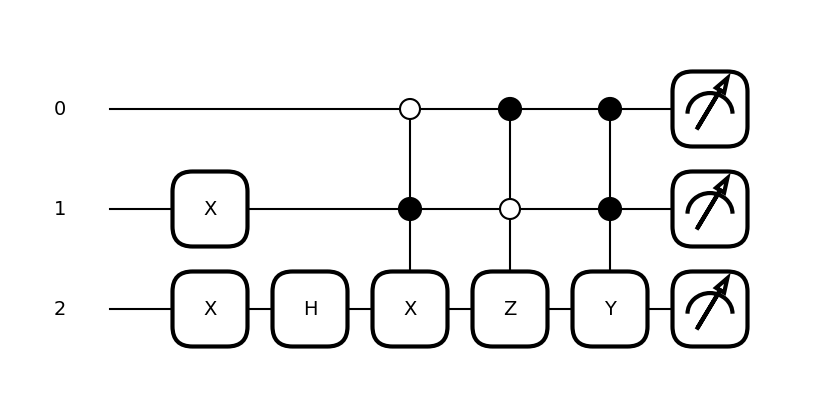

In [30]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]

@qml.qnode(device=dev)
def apply_control_sequence(state):
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1) 

    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)
    
    qml.ctrl(qml.PauliX, (0,1), control_values=(0,1))(wires=2)
    qml.ctrl(qml.PauliZ, (0,1), control_values=(1,0))(wires=2)
    qml.ctrl(qml.PauliY, (0,1), control_values=(1,1))(wires=2)

    return qml.state()
    
print(apply_control_sequence(state))
qml.draw_mpl(apply_control_sequence)(state)
